<a href="https://colab.research.google.com/github/seonae0223/machine_learning/blob/main/03_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

np.random.seed(121)
a = np.random.randn(4, 4)
a

array([[-0.21203317, -0.28492917, -0.57389821, -0.44031017],
       [-0.33011056,  1.18369457,  1.61537293,  0.36706247],
       [-0.01411931,  0.6296418 ,  1.70964074, -1.32698736],
       [ 0.40187312, -0.19142667,  1.40382596, -1.96876855]])

In [ ]:
U, Sigma, VT = np.linalg.svd(a)

print("U : {}".format(U))
print()
print("Sigma : {}".format(Sigma))
print()
print("U : {}".format(U))
print()

U : [[-0.07913928 -0.31822729  0.86653217  0.37628494]
 [ 0.38294523  0.78655287  0.12002097  0.46934262]
 [ 0.65640669  0.02243181  0.35668848 -0.66437971]
 [ 0.64515128 -0.52873697 -0.32785711  0.44353889]]

Sigma : [3.4229581  2.02287339 0.46263157 0.07935069]

U : [[-0.07913928 -0.31822729  0.86653217  0.37628494]
 [ 0.38294523  0.78655287  0.12002097  0.46934262]
 [ 0.65640669  0.02243181  0.35668848 -0.66437971]
 [ 0.64515128 -0.52873697 -0.32785711  0.44353889]]



In [ ]:
# 특잇값 Sigma를 대각행렬로 변환

Sigma_mat = np.diag(Sigma)
Sigma_mat

'''
첫 번째, 두 번째 값이 아주 크고 나머지는 작아짐.
array([[3.4229581 , 0.        , 0.        , 0.        ],
       [0.        , 2.02287339, 0.        , 0.        ],
       [0.        , 0.        , 0.46263157, 0.        ],
       [0.        , 0.        , 0.        , 0.07935069]])
'''

array([[3.4229581 , 0.        , 0.        , 0.        ],
       [0.        , 2.02287339, 0.        , 0.        ],
       [0.        , 0.        , 0.46263157, 0.        ],
       [0.        , 0.        , 0.        , 0.07935069]])

In [ ]:
print("원본 행렬 A : \n{}".format(a))

원본 행렬 A : 
[[-0.21203317 -0.28492917 -0.57389821 -0.44031017]
 [-0.33011056  1.18369457  1.61537293  0.36706247]
 [-0.01411931  0.6296418   1.70964074 -1.32698736]
 [ 0.40187312 -0.19142667  1.40382596 -1.96876855]]


In [ ]:
# U, Sigmamat, VT를 이용해서 다시 조립
a_ = U @ Sigma_mat @ VT # U와 Sigmamat을 내적 -> Sigmamat과 VT를 내적
a_

array([[-0.21203317, -0.28492917, -0.57389821, -0.44031017],
       [-0.33011056,  1.18369457,  1.61537293,  0.36706247],
       [-0.01411931,  0.6296418 ,  1.70964074, -1.32698736],
       [ 0.40187312, -0.19142667,  1.40382596, -1.96876855]])

In [ ]:
# Truncated Sigma_mat : 원본 데이터를 보다 많이 반영 할 수 있는 상위 2개의 특잇값만 추출
Sigma_truncated = np.diag(Sigma[:2])
Sigma_truncated

array([[3.4229581 , 0.        ],
       [0.        , 2.02287339]])

In [ ]:
U_truncated = U[:, :2]
U_truncated

array([[-0.07913928, -0.31822729],
       [ 0.38294523,  0.78655287],
       [ 0.65640669,  0.02243181],
       [ 0.64515128, -0.52873697]])

In [ ]:
# 'ㅓ' 자 형태로 곱해짐
VT_truncated = VT[:2]
VT_truncated

array([[ 0.04100747,  0.22367823,  0.78643002, -0.57429458],
       [-0.20019867,  0.56209596,  0.37041464,  0.71187191]])

In [ ]:
# 2개의 특잇값(잠재 변수)를 이용해서 조립
a_truncated = U_truncated @ Sigma_truncated @ VT_truncated
a_truncated

array([[ 0.11776606, -0.4224323 , -0.45148469, -0.3026849 ],
       [-0.26478267,  1.18754777,  1.62022235,  0.37986869],
       [ 0.08305338,  0.52807808,  1.78380053, -1.25805288],
       [ 0.30468393, -0.10724542,  1.34051007, -2.02962493]])

In [ ]:
a

array([[-0.21203317, -0.28492917, -0.57389821, -0.44031017],
       [-0.33011056,  1.18369457,  1.61537293,  0.36706247],
       [-0.01411931,  0.6296418 ,  1.70964074, -1.32698736],
       [ 0.40187312, -0.19142667,  1.40382596, -1.96876855]])

In [ ]:
# 데이터가 선형 종속인 상태로 만들기
a[2] = a[0] + a[1]
a[3] = a[0]

a

array([[-0.21203317, -0.28492917, -0.57389821, -0.44031017],
       [-0.33011056,  1.18369457,  1.61537293,  0.36706247],
       [-0.54214372,  0.8987654 ,  1.04147472, -0.0732477 ],
       [-0.21203317, -0.28492917, -0.57389821, -0.44031017]])

In [ ]:
# 선형 종속이면 역행렬이 존재하지 않을 수도 있다.
# 특잇값 중 하나라도 0이 있으면 역행렬이 존재하지 않는다.
# det(A) = 0

U,Sigma, VT = np.linalg.svd(a)
Sigma

# 출력 결과
# array([2.66335286e+00, 8.07035060e-01, 1.82933987e-16, 4.23262754e-17])
# 결과를 확인하면, 앞의 두 개의 특잇값을 제외한 나머지 특잇값은 모두 거의 0에 가까운 값이 된다.
# 따라서 모든 종류를 다 쓰는 것 보다 2개의 종류를 쓰는 것만 의미 있다는 것을 알 수 있다.
# 최종적으로 특잇값을 확인하여 차원 축소를 몇 차원까지 할 지 알 수 있게 된다.
# 만약, 모든 특잇값을 쓸 수 있다는 것은 -> 차원 축소 없이 모두 데이터를 사용하라는 의미이다.

array([2.66335286e+00, 8.07035060e-01, 1.82933987e-16, 4.23262754e-17])

# 사이킷런의 TruncatedSVD

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()

In [ ]:
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris.data)

iris_tsvd = tsvd.transform(iris.data)
iris_tsvd.shape

(150, 2)

In [ ]:
import pandas as pd

iris_tsvd_df = pd.DataFrame(
    data=iris_tsvd,
    columns=["component_1", "component_2"]
)

iris_tsvd_df['target'] = iris.target
iris_tsvd_df.head()

,component_1,component_2,target
0,5.912747,2.302033,0
1,5.572482,1.971826,0
2,5.446977,2.095206,0
3,5.436459,1.870382,0
4,5.875645,2.328290,0


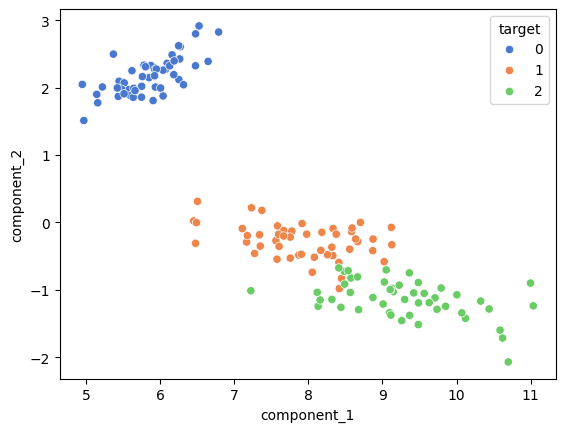

In [ ]:
sns.scatterplot(
    x="component_1",
    y="component_2",
    hue='target',
    palette='muted',
    data=iris_tsvd_df
)

plt.show()

Text(0.5, 1.0, 'PCA Transformed')

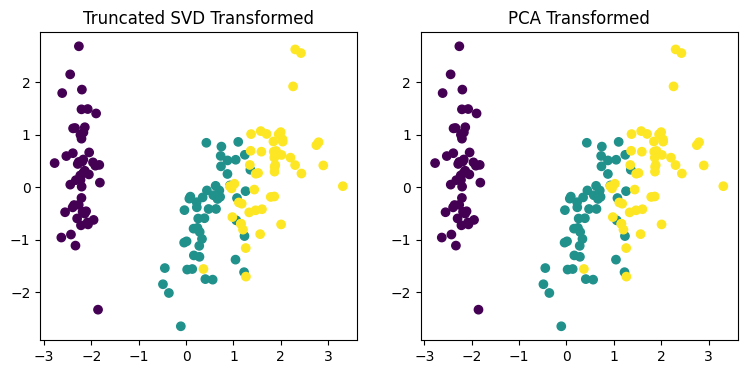

In [ ]:
# Truncated SVD나, PCA나 어차피 같은 스케일로 맞춰지는 스케일링 이므로, 똑같아진다.

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# iris 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris.data)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
ax2.scatter(x=iris_pca[:,0], y= iris_pca[:,1], c= iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')